# **Self Organizing Maps for Covid 19 Articles:**
## *Understanding the Topology of Corona Literature*



Steps: 
1.   Drop Outlier
2.   create a dtm l1 matrixs
3.   Check Errors
4.   Train SOM
5.   Analyze Graphs
6.   Drop Outliers
7.   repeat 

In [1]:
### importing dependencies ###
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

### tokenizers #####
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import wordpunct_tokenize

### DTM tehcniques ###
from sklearn.feature_extraction.text import TfidfTransformer
from nltk import word_tokenize 


## DTM Makers ####
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from nltk import wordpunct_tokenize
import nltk
nltk.download("stopwords")

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MinMaxScaler
import sys
import matplotlib.pyplot as plt
!pip install minisom
import seaborn as sns 
import matplotlib.pyplot as plt
import sys

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install minisom

## **Dropping Outliers**
This step is skipped in the first round

In [0]:
master_text = pd.read_csv("/content/drive/My Drive/covid 19 exploration/df/master_text.csv")
drops=pd.read_pickle('/content/drive/My Drive/covid 19 exploration/df/drop_list.pkl')
drops_2=pd.read_pickle('/content/drive/My Drive/covid 19 exploration/df/drop_list_2.pkl')
drops_3=pd.read_pickle('/content/drive/My Drive/covid 19 exploration/df/drop_list_3.pkl')
drops_4=pd.read_pickle('/content/drive/My Drive/covid 19 exploration/df/drop_list_4.pkl')
drops_5=pd.read_pickle('/content/drive/My Drive/covid 19 exploration/df/drop_list_5.pkl')
drops_6=pd.read_pickle('/content/drive/My Drive/covid 19 exploration/df/drop_list_6.pkl')


drops=drops.append(drops_2)
drops=drops.append(drops_3)
drops=drops.append(drops_4)
drops=drops.append(drops_5)
drops=drops.append(drops_6)


drops= set(drops)

master_text=master_text[~master_text.paper_id.isin(drops)]


# **Creating a DTM**

In [27]:
### Stop Words ####
en_stop = stopwords.words('english')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

# Additions to the stop word list
en_stop.extend([".","-","(", ")","/", r",+", "’", "”","“", "\n",r"\\)","!","?",r"\\(",r"\\'",r'\\"','covid', 'use','doi','peerreview','et','al'])

stem_function= PorterStemmer
port=PorterStemmer

## stemer function
def stemer(tokens, stem_function):
    stems=[]
    for token in tokens:
        stem=port().stem(token)
        stems.append(stem)
    return stems

## tokenizes words
def tokenizer(text):
    text=re.sub("[^a-z|^\s]", "",  text) # regex to get ride of function
    toks=wordpunct_tokenize(text.lower()) # converting everything to lower case
    new_words= [word for word in toks if word.isalnum()]
    stemed=stemer(toks, stem_function)
    return stemed


####### Abstract to DTM ##########
abstracts = master_text[~master_text.abstract.isna()]

abstracts = abstracts ### temporary, just so i can continue to code   


word_list = abstracts.abstract.to_list()  
vect = CountVectorizer(tokenizer=tokenizer, stop_words = en_stop, ngram_range= (1,2), max_features = 1000)
vect.fit(word_list)
dtm = vect.transform(word_list)   
df2 = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
df2.to_csv('dtm_clean1.csv')
df2.head()




/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'ha', 'hadnt', 'hasnt', 'havent', 'hi', 'isnt', 'mightnt', 'mustnt', 'neednt', 'onc', 'onli', 'ourselv', 'shant', 'shouldnt', 'shouldv', 'thatll', 'themselv', 'thi', 'veri', 'wa', 'wasnt', 'werent', 'whi', 'wont', 'wouldnt', 'youd', 'youll', 'yourselv', 'youv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,abil,abl,absenc,abstract,access,accord,account,accumul,accur,ace,achiev,acid,across,act,action,activ,acut,acut respiratori,ad,adapt,addit,address,adenoviru,administr,admiss,adult,advanc,affect,age,agent,aim,airway,algorithm,allow,alon,also,alter,altern,although,amino,...,viru replic,virul,virus,vitro,vivo,vp,vs,wa,wa also,wa associ,wa detect,wa found,wa observ,wa perform,wa significantli,water,way,week,weight,well,wherea,whether,whole,wide,wild,within,without,work,worker,world,worldwid,would,x,year,yet,yield,young,zikv,zoonot,|
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# **Using a Tfidf L1 Normalized Matrixs**

In [0]:
######## Creating L1 normalized term freq matrixs
tfdif = TfidfTransformer(norm='l1', use_idf=True)
dtm_l1 = tfdif.fit_transform(df2)

### l2 DTM #####
dtm_l1=pd.DataFrame(dtm_l1.toarray(), columns=vect.get_feature_names(), index = abstracts.index)
dtm_l1=pd.concat([abstracts.paper_id,  dtm_l1], axis=1)

dtm_l1.to_csv('/content/drive/My Drive/covid 19 exploration/df/dtm_l1_clean_1.csv')

  # **Trianing / Building a Self Organized Map:**

  Key terms: <br>

  quantization error : Average distance between each data vector and its BMU.
       Measures map resolution. <br>
  Topographic Error : Topographic error, the proportion of all data vectors
       for which first and second BMUs are not adjacent units.
       Measures topology preservation.

      

In [29]:
dtm_l1 = pd.read_csv('/content/drive/My Drive/covid 19 exploration/df/dtm_l1_clean_1.csv') 
dtm_l1.iloc[:,2:]

,abil,abl,absenc,abstract,access,accord,account,accumul,accur,ace,achiev,acid,across,act,action,activ,acut,acut respiratori,ad,adapt,addit,address,adenoviru,administr,admiss,adult,advanc,affect,age,agent,aim,airway,algorithm,allow,alon,also,alter,altern,although,amino,...,viru replic,virul,virus,vitro,vivo,vp,vs,wa,wa also,wa associ,wa detect,wa found,wa observ,wa perform,wa significantli,water,way,week,weight,well,wherea,whether,whole,wide,wild,within,without,work,worker,world,worldwid,would,x,year,yet,yield,young,zikv,zoonot,|
0,0.0,0.0,0.0,0.016853,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.022299,0.0,0.000000,0.0,0.0,0.020217,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.005021,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.008829,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.021869,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.010679,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.011392,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.012328,0.0,0.0,0.0,0.0,0.000000,0.011334,0.0,0.0,0.011303,0.0,0.0,0.000000,0.0,0.000000,0.0,0.009817,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.015397,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.013348,0.000000,0.00775,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.009933,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.006813,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.009741,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.02342,0.0,0.0,0.000000,0.0,0.000000,0.066276,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.107821,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.017935,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.064972,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.020375,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.022170,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18326,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00987,0.011656,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.011767,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.011287,0.0,0.0,0.0,0.0,0.014785,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.013971,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18327,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00

In [30]:
#### 10, 10, lr = .05, buble sigma, 3, iteration = 5000 
dtm_l1 = pd.read_csv('/content/drive/My Drive/covid 19 exploration/df/dtm_l1_clean_1.csv') 

som = MiniSom(x=10, y=10, input_len=dtm_l1.iloc[:,2:].shape[1] , sigma=4, learning_rate=0.05, neighborhood_function='bubble', random_seed=10)

X = dtm_l1.iloc[:,2:].values

data=X
som.pca_weights_init(X)
max_iter = dtm_l1.shape[0]
q_error = []
t_error = []
iter_x = []


for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(data)) # This corresponds to train_random() method.
    som.update(data[i], som.winner(data[i]), i, max_iter)
    if (i+1) % 100 == 0:
        q_error.append(som.quantization_error(data))
        t_error.append(som.topographic_error(data))
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}%')
        

cord=[som.winner(row) for row in data]
dtm_l1['cord'] = pd.Series(cord)

iteration=18299 status=99.83%

## **Checking Topogrpahical and Quantization Error**


/content/drive/My Drive/covid 19 exploration/graphs


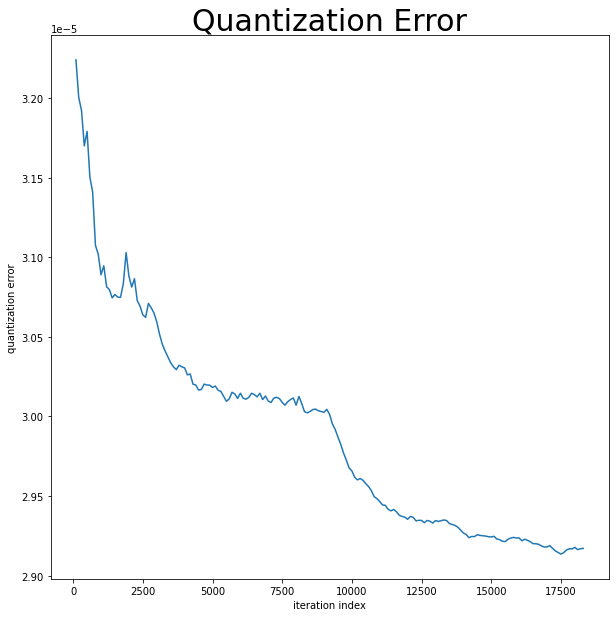

<Figure size 432x288 with 0 Axes>

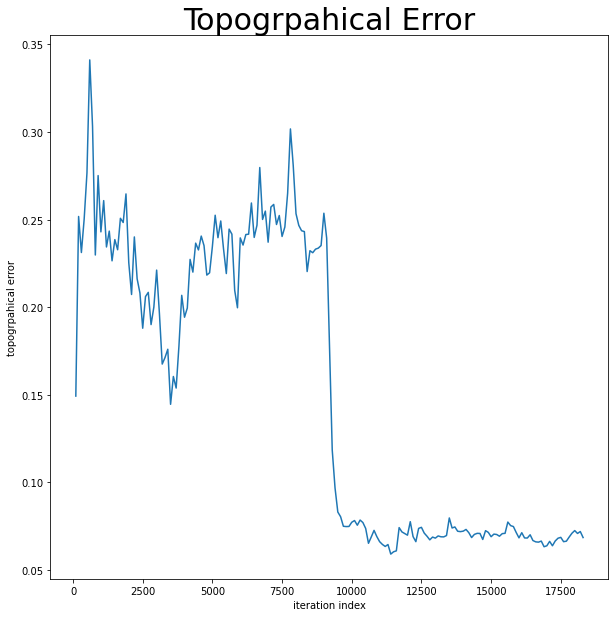

In [31]:
%cd "/content/drive/My Drive/covid 19 exploration/graphs"
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(iter_x, q_error)
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.title('Quantization Error', size=30)
plt.show()
plt.savefig('Quantization.png', dpi=300)

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(iter_x, t_error)
plt.ylabel('topogrpahical error')
plt.xlabel('iteration index')
plt.title('Topogrpahical Error', size=30)
plt.savefig('topogrpahical.png', dpi=300)


# **Analysis**
## *Parts*:
*   Graph: Distance Matrixs overlayed with Frequencey counts <br>
*   Most common word in a nueron <br>
*   Titles of a nueron given it has the most frequent words

### Graph: Distance Matrixs overlayed with Frequencey counts <br>

/content/drive/My Drive/covid 19 exploration/graphs


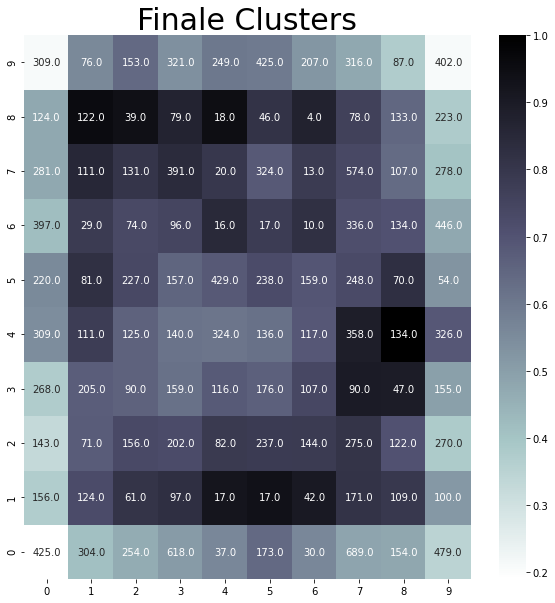

In [36]:
import seaborn as sns
distance = som.distance_map().T
frequencies = som.activation_response(data=data).T
%cd "/content/drive/My Drive/covid 19 exploration/graphs"
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(distance, cmap='bone_r', ax=ax, annot=frequencies, fmt='1')
g.set_title('Finale Clusters', size=30)
ax.invert_yaxis()
plt.savefig('fin_clusters.png', dpi=300)


## Most common words in a Nueron


In [47]:
#### analyzing the outliers
print(dtm_l1[dtm_l1.cord == (5, 1)].iloc[:,2:-1].sum().sort_values(ascending=False)[0:50].index)

Index(['dog', 'canin', 'c', 'r', 'rotaviru', 'b', 'l', 'n', 'wa', 'ci', 'j',
       'temperatur', 'case', 'anim', 'report', 'inactiv', 'infect', 'agent',
       'thi', 'organ', 'diarrhea', 'caus', 'sampl', 'materi', 'frequent',
       'polymeras chain', 'viru', 'mass', 'chain reaction', 'intestin',
       'surviv', 'sign', 'coinfect', 'contact', 'reaction', 'condit', 'death',
       'risk', 'diseas', 'chain', 'hcv', 'identifi', 'polymeras', 'show',
       'associ', 'isol', 'lesion', 'examin', 'andor', 'human'],
      dtype='object')


## Titles of a nueron given it has the most frequent words

In [45]:
# master_text = pd.read_csv("/content/drive/My Drive/covid 19 exploration/mycode/master_text.csv")
# drops=pd.read_pickle('/content/drive/My Drive/covid 19 exploration/df/drop_list.pkl')
# master_text=master_text[~master_text.paper_id.isin(drops)]

master_text = pd.read_csv("/content/drive/My Drive/covid 19 exploration/mycode/master_text.csv")
master_text

abstracts = master_text[~master_text.abstract.isna()]

abstracts[abstracts.paper_id.isin(dtm_l1[dtm_l1.cord == (1,8)].paper_id.to_list())].iloc[:,2:5].papepr_title.iloc[2]


'Far-UVC light: A new tool to control the spread of airborne-mediated microbial 1 diseases 2'

## Save Outliers for Feature Drops

In [176]:
drop_list=dtm_l1[dtm_l1.cord == (1,5)].paper_id.to_list() + dtm_l1[dtm_l1.cord == (4,5)].paper_id.to_list() +\
dtm_l1[dtm_l1.cord == (6,7)].paper_id.to_list() + dtm_l1[dtm_l1.cord == (8,7)].paper_id.to_list()
len(drop_list)

1035



---
# **See PDF to Get the Final Reuslts**

